## IMPORTS

In [88]:
import pyodbc
import pandas as pd
import seaborn as sns

# From an MS SQL Server Database
# IMDB
### Open a database connection

In [89]:
connection = pyodbc.connect(
    server = "cisdbss.pcc.edu",
    user = "275student",
    password = "275student",
    database = "IMDB",
    driver = "{ODBC Driver 17 for SQL Server}"
)

connection

### Load the Dataframe for title_basics

In [90]:
df = pd.read_sql_query("""
SELECT * 
FROM title_basics
WHERE startYear = 2000
""", connection)

df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes
0,tt0102362,movie,Istota,Istota,False,2000,NaN,80.0
1,tt0113742,short,Making Change,Making Change,False,2000,NaN,18.0
2,tt0115874,short,Chateaubriand - Cabeça de Paraíba,Chateaubriand - Cabeça de Paraíba,False,2000,NaN,15.0
3,tt0115937,movie,Consequence,Consequence,False,2000,NaN,91.0
4,tt0116391,movie,Gang,Gang,False,2000,NaN,152.0
...,...,...,...,...,...,...,...,...
71098,tt8021846,tvEpisode,Episode #1.196,Episode #1.196,False,2000,NaN,NaN
71099,tt8021850,tvEpisode,Episode #1.197,Episode #1.197,False,2000,NaN,NaN
71100,tt8021852,tvEpisode,Episode #1.199,Episode #1.199,False,2000,NaN,NaN
71101,tt8021854,tvEpisode,Episode #1.198,Episode #1.198,False,2000,NaN,NaN


### Display the dataframe info

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71103 entries, 0 to 71102
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          71103 non-null  object 
 1   titleType       71103 non-null  object 
 2   primaryTitle    71103 non-null  object 
 3   originalTitle   71103 non-null  object 
 4   isAdult         71103 non-null  bool   
 5   startYear       71103 non-null  int64  
 6   endYear         748 non-null    float64
 7   runtimeMinutes  19288 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 3.9+ MB


### Drop the rows in the runtimeMinutes column that contain NA (Non available) values

In [92]:
df = df.dropna(subset=['runtimeMinutes'])
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes
0,tt0102362,movie,Istota,Istota,False,2000,NaN,80.0
1,tt0113742,short,Making Change,Making Change,False,2000,NaN,18.0
2,tt0115874,short,Chateaubriand - Cabeça de Paraíba,Chateaubriand - Cabeça de Paraíba,False,2000,NaN,15.0
3,tt0115937,movie,Consequence,Consequence,False,2000,NaN,91.0
4,tt0116391,movie,Gang,Gang,False,2000,NaN,152.0
...,...,...,...,...,...,...,...,...
71057,tt8016010,video,Censored tt8016010,Censored tt8016010,True,2000,NaN,53.0
71079,tt8018566,video,Peter Gabriel: The Nest That Sailed the Sky,Peter Gabriel: The Nest That Sailed the Sky,False,2000,NaN,5.0
71080,tt8019172,tvShort,Harald Leipnitz - Der Verletzliche,Harald Leipnitz - Der Verletzliche,False,2000,NaN,15.0
71081,tt8020682,tvShort,Günther Neutze - Der Zyniker,Günther Neutze - Der Zyniker,False,2000,NaN,15.0


### Select the relevant columns

In [93]:
selected = df[["tconst", "titleType", "primaryTitle", "runtimeMinutes"]]
selected

,tconst,titleType,primaryTitle,runtimeMinutes
0,tt0102362,movie,Istota,80.0
1,tt0113742,short,Making Change,18.0
2,tt0115874,short,Chateaubriand - Cabeça de Paraíba,15.0
3,tt0115937,movie,Consequence,91.0
4,tt0116391,movie,Gang,152.0
...,...,...,...,...
71057,tt8016010,video,Censored tt8016010,53.0
71079,tt8018566,video,Peter Gabriel: The Nest That Sailed the Sky,5.0
71080,tt8019172,tvShort,Harald Leipnitz - Der Verletzliche,15.0
71081,tt8020682,tvShort,Günther Neutze - Der Zyniker,15.0


### Rename those selected columns to more useful names

In [94]:
selected = selected.rename(columns={"primaryTitle": "Title", "startYear": "Year",
                                   "runtimeMinutes": "Length"})
selected

,tconst,titleType,Title,Length
0,tt0102362,movie,Istota,80.0
1,tt0113742,short,Making Change,18.0
2,tt0115874,short,Chateaubriand - Cabeça de Paraíba,15.0
3,tt0115937,movie,Consequence,91.0
4,tt0116391,movie,Gang,152.0
...,...,...,...,...
71057,tt8016010,video,Censored tt8016010,53.0
71079,tt8018566,video,Peter Gabriel: The Nest That Sailed the Sky,5.0
71080,tt8019172,tvShort,Harald Leipnitz - Der Verletzliche,15.0
71081,tt8020682,tvShort,Günther Neutze - Der Zyniker,15.0


### Clean the data types in these columns

In [95]:
selected['titleType'] = selected['titleType'].astype('str')
selected['Title'] = selected['Title'].astype('str')
selected['Length'] =selected['Length'].astype('int')
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19288 entries, 0 to 71082
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tconst     19288 non-null  object
 1   titleType  19288 non-null  object
 2   Title      19288 non-null  object
 3   Length     19288 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 678.1+ KB


# Lab6
##  For each of your dataframes, prepare and analyze the data. Each dataframe must include at least one of the following preparation steps:
## 1. Add or modify at least one column. You can either use built-in pandas functions or methods or create your own function (named or lambda) and use apply.
## 2. Explicitly set or reset the index (or execute a command such as pivot or groupby that changes the index).
## 3. Combine data from multiple sources using join and concat.
## In addition, at least one dataframe must include at least one of the following analysis steps:
## 4. Reshape the data using unstack, pivot, pivot_table, or melt.
## 5. Group and aggregate the data.
## 6.In addition, each dataframe must include at least one data visualization (line plot, bar chart, histogram, or scatter plot are all fine).
## Organize your notebook to group functionality into separate code cells (for example, use separate cells to simplify your data, and to fix column datatypes).

### 1. Modify title to uppercase

In [96]:
selected['Title'] = selected.Title.str.upper()
selected

,tconst,titleType,Title,Length
0,tt0102362,movie,ISTOTA,80
1,tt0113742,short,MAKING CHANGE,18
2,tt0115874,short,CHATEAUBRIAND - CABEÇA DE PARAÍBA,15
3,tt0115937,movie,CONSEQUENCE,91
4,tt0116391,movie,GANG,152
...,...,...,...,...
71057,tt8016010,video,CENSORED TT8016010,53
71079,tt8018566,video,PETER GABRIEL: THE NEST THAT SAILED THE SKY,5
71080,tt8019172,tvShort,HARALD LEIPNITZ - DER VERLETZLICHE,15
71081,tt8020682,tvShort,GÜNTHER NEUTZE - DER ZYNIKER,15


### Change the index

In [97]:
selected.set_index('tconst', inplace=True)
selected.head(3)

,titleType,Title,Length
tconst,,,
tt0102362,movie,ISTOTA,80
tt0113742,short,MAKING CHANGE,18
tt0115874,short,CHATEAUBRIAND - CABEÇA DE PARAÍBA,15


### Load the Dataframe for Genre

In [98]:
dfg = pd.read_sql_query("""
SELECT * 
FROM title_genre
""", connection)

dfg

MemoryError: Unable to allocate 111. MiB for an array with shape (7297619,) and data type complex128

In [ ]:
dfg.info()

### join Genre to title_basics

In [ ]:
df_joined = df.join(dfg, how='left', lsuffix = '_1', rsuffix = '_2')
df_joined

## Concat Genre to title_basics by adding columns from dfg to df

In [15]:
df_concat = pd.concat([df,dfg], axis=1)
df_concat.head(10)

,0,1,2,3,4,5,6,7,8,9
0,tt0102362,movie,Istota,Istota,False,2000.0,NaN,80.0,tt0000439,Action
1,tt0113742,short,Making Change,Making Change,False,2000.0,NaN,18.0,tt0000447,Action
2,tt0115874,short,Chateaubriand - Cabeça de Paraíba,Chateaubriand - Cabeça de Paraíba,False,2000.0,NaN,15.0,tt0000496,Action
3,tt0115937,movie,Consequence,Consequence,False,2000.0,NaN,91.0,tt0000521,Action
4,tt0116391,movie,Gang,Gang,False,2000.0,NaN,152.0,tt0000522,Action
5,tt0116628,movie,The Incorporated,The Incorporated,False,2000.0,NaN,86.0,tt0000628,Action
6,tt0116748,movie,Karobaar: The Business of Love,Karobaar: The Business of Love,False,2000.0,NaN,180.0,tt0000642,Action
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0000654,Action
8,tt0117707,short,Space Pigs,Space-pigs,False,2000.0,NaN,28.0,tt0000668,Action
9,tt0118694,movie,In the Mood for Love,Faa yeung nin wa,False,2000.0,NaN,98.0,tt0000694,Action


## 4. Reshape the data using unstack, pivot, pivot_table, or melt.

In [ ]:
df.pivot(index='tconst', columns='runtimeMinutes', values='runtimeMinutes').head(2)

In [ ]:
df_melted = pd.melt(df_joined, id_vars='tconst_1',
                      value_vars=['primaryTitle','genre'],
                      var_name='title_genre', value_name='title-genre')
df_melted

## 5. Group and aggregate the data.

In [ ]:
df

In [100]:
cat_group = df.groupby('titleType').mean('runtimeMinutes')
cat_group

,isAdult,startYear,endYear,runtimeMinutes
titleType,,,,
movie,0.006542,2000.0,NaN,90.382821
short,0.000292,2000.0,NaN,14.667641
tvEpisode,0.000327,2000.0,NaN,39.061795


## 6.In addition, each dataframe must include at least one data visualization (line plot, bar chart, histogram, or scatter plot are all fine).

<AxesSubplot:xlabel='titleType'>

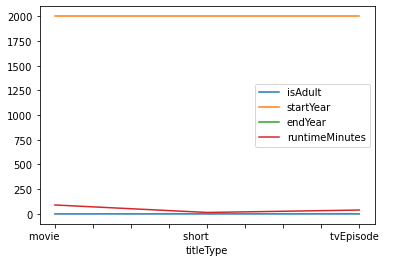

In [102]:
cat_group.plot()

# FROM AMANZON CSV

### Load the data frame

In [70]:
df = pd.read_csv("Amazon_Best_Seller_2021_June.csv")
df

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99
...,...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,https://www.amazon.com/gp/offer-listing/B007DW...,10 Sellers,#95,4.6,"8,795",$6.99
703,B01N16VX79,Toys & Games,https://www.amazon.com/gp/offer-listing/B01N16...,5 Sellers,#96,4.7,649,$16.99
704,B09197N995,Toys & Games,https://www.amazon.com/gp/offer-listing/B09197...,1 Sellers,#97,4.8,"9,121",$8.99
705,B015CCR1FW,Toys & Games,https://www.amazon.com/gp/offer-listing/B015CC...,26 Sellers,#98,4.7,"18,449",$19.99


### Rename the columns

In [73]:
df = df.rename(columns={"No of Sellers": "Sellers", "Reviews Count": "Reviews"})                     
df

,ASIN,Category,Product Link,Sellers,Rank,Rating,Reviews,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99
...,...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,https://www.amazon.com/gp/offer-listing/B007DW...,10 Sellers,#95,4.6,"8,795",$6.99
703,B01N16VX79,Toys & Games,https://www.amazon.com/gp/offer-listing/B01N16...,5 Sellers,#96,4.7,649,$16.99
704,B09197N995,Toys & Games,https://www.amazon.com/gp/offer-listing/B09197...,1 Sellers,#97,4.8,"9,121",$8.99
705,B015CCR1FW,Toys & Games,https://www.amazon.com/gp/offer-listing/B015CC...,26 Sellers,#98,4.7,"18,449",$19.99


### Clean the data

In [74]:
df['Sellers'] = df.Sellers.replace( { "Sellers": "" }, regex=True)
df['Rank'] = df.Rank.replace({ "[#]": "" }, regex=True)
df['Price'] = df.Price.replace({ "[$]": ""}, regex=True )
df['Reviews'] = df.Reviews.replace({ ",": ""}, regex=True )
df

,ASIN,Category,Product Link,Sellers,Rank,Rating,Reviews,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1,1,4.7,640721,39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1,2,4.7,854114,34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1,3,4.7,267821,44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27,4,4.8,114267,28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1,5,4.7,267821,49.99
...,...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,https://www.amazon.com/gp/offer-listing/B007DW...,10,95,4.6,8795,6.99
703,B01N16VX79,Toys & Games,https://www.amazon.com/gp/offer-listing/B01N16...,5,96,4.7,649,16.99
704,B09197N995,Toys & Games,https://www.amazon.com/gp/offer-listing/B09197...,1,97,4.8,9121,8.99
705,B015CCR1FW,Toys & Games,https://www.amazon.com/gp/offer-listing/B015CC...,26,98,4.7,18449,19.99


## Convert the data types

In [75]:
df['ASIN'] = df['ASIN'].astype('str')
df['Category'] = df['Category'].astype('str')
df['Sellers'] =df['Sellers'].astype('int','ignore')
df['Rank'] =df['Rank'].astype('int')
df['Rating'] =df['Rating'].astype('float')
df['Reviews'] =df['Reviews'].astype('int')
df['Price'] =df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ASIN          707 non-null    object 
 1   Category      707 non-null    object 
 2   Product Link  707 non-null    object 
 3   Sellers       707 non-null    int32  
 4   Rank          707 non-null    int32  
 5   Rating        707 non-null    float64
 6   Reviews       707 non-null    int32  
 7   Price         707 non-null    float64
dtypes: float64(2), int32(3), object(3)
memory usage: 36.0+ KB


## 1. Modify category to lowercase

In [56]:
df['Category'] = df.Category.str.lower()
df

,ASIN,Category,Product Link,Sellers,Rank,Rating,Reviews,Price
0,B079QHML21,electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1,1,4.7,640721,39.99
1,B07FZ8S74R,electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1,2,4.7,854114,34.99
2,B07XJ8C8F5,electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1,3,4.7,267821,44.99
3,B07WVFCVJN,electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27,4,4.8,114267,28.48
4,B08YT2N5SX,electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1,5,4.7,267821,49.99
...,...,...,...,...,...,...,...,...
702,B007DW6F34,toys & games,https://www.amazon.com/gp/offer-listing/B007DW...,10,95,4.6,8795,6.99
703,B01N16VX79,toys & games,https://www.amazon.com/gp/offer-listing/B01N16...,5,96,4.7,649,16.99
704,B09197N995,toys & games,https://www.amazon.com/gp/offer-listing/B09197...,1,97,4.8,9121,8.99
705,B015CCR1FW,toys & games,https://www.amazon.com/gp/offer-listing/B015CC...,26,98,4.7,18449,19.99


### 2. Explicitly set or reset the index (or execute a command such as pivot or groupby that changes the index).

In [76]:
df.set_index('ASIN', inplace=True)
df.head(3)

,Category,Product Link,Sellers,Rank,Rating,Reviews,Price
ASIN,,,,,,,
B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1,1,4.7,640721,39.99
B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1,2,4.7,854114,34.99
B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1,3,4.7,267821,44.99


## 3. Combine data from multiple sources using join and concat.

In [58]:
df1 = df.drop(columns=['Rank','Rating', 'Reviews', 'Price'])
df1

,Category,Product Link,Sellers
ASIN,,,
B079QHML21,electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1
B07FZ8S74R,electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1
B07XJ8C8F5,electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1
B07WVFCVJN,electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27
B08YT2N5SX,electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1
...,...,...,...
B007DW6F34,toys & games,https://www.amazon.com/gp/offer-listing/B007DW...,10
B01N16VX79,toys & games,https://www.amazon.com/gp/offer-listing/B01N16...,5
B09197N995,toys & games,https://www.amazon.com/gp/offer-listing/B09197...,1


In [59]:
df2 = df.drop(columns=['Category','Product Link', 'Sellers'])
df2

,Rank,Rating,Reviews,Price
ASIN,,,,
B079QHML21,1,4.7,640721,39.99
B07FZ8S74R,2,4.7,854114,34.99
B07XJ8C8F5,3,4.7,267821,44.99
B07WVFCVJN,4,4.8,114267,28.48
B08YT2N5SX,5,4.7,267821,49.99
...,...,...,...,...
B007DW6F34,95,4.6,8795,6.99
B01N16VX79,96,4.7,649,16.99
B09197N995,97,4.8,9121,8.99


In [62]:
dfc = pd.concat([df1,df2], axis=1)
dfc

,Category,Product Link,Sellers,Rank,Rating,Reviews,Price
ASIN,,,,,,,
B079QHML21,electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1,1,4.7,640721,39.99
B07FZ8S74R,electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1,2,4.7,854114,34.99
B07XJ8C8F5,electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1,3,4.7,267821,44.99
B07WVFCVJN,electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27,4,4.8,114267,28.48
B08YT2N5SX,electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1,5,4.7,267821,49.99
...,...,...,...,...,...,...,...
B007DW6F34,toys & games,https://www.amazon.com/gp/offer-listing/B007DW...,10,95,4.6,8795,6.99
B01N16VX79,toys & games,https://www.amazon.com/gp/offer-listing/B01N16...,5,96,4.7,649,16.99
B09197N995,toys & games,https://www.amazon.com/gp/offer-listing/B09197...,1,97,4.8,9121,8.99


In [ ]:
df1 = df1.drop(columns=['Rank','Rating', 'Reviews Count', Price])
shots1 = shots.head(2)
shots2 = shots.query('game_id == "0020900030"').head(1)
shots3 = shots.query('game_id == "0020900069"').head(1)
shots = pd.concat([shots1,shots2,shots3], ignore_index=True)
shots.set_index('game_id', inplace = True)

### Group and aggregate the data.

In [77]:
cat_group = df.groupby('Category').sum('Sellers')

,Sellers,Rank,Rating,Reviews,Price
Category,,,,,
Books,146,2899,327.2,1812958,804.67
Camera & Photo,385,5050,432.4,721754,5063.08
"Clothing, Shoes & Jewelry",374,5050,447.3,2868554,1760.87
Electronics,908,8646,678.7,11309903,19907.48
Gift Cards,100,5050,480.7,33486769,4400.74
Toys & Games,1288,4775,441.8,1680303,1639.33
Video Games,2691,4839,439.5,2562960,5794.08


## 6.In addition, each dataframe must include at least one data visualization (line plot, bar chart, histogram, or scatter plot are all fine).

<AxesSubplot:xlabel='Category'>

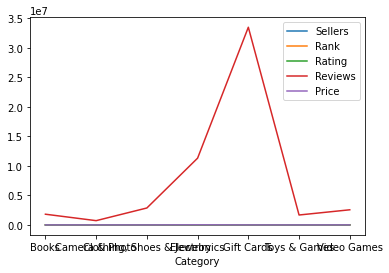

In [87]:
cat_group.plot()